In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from IPython.display import Image

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
import cv2,os

data_path='CT'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'COVID': 0, 'Non COVID': 1}
['COVID', 'Non COVID']
[0, 1]


In [3]:
img_size=100,100,1
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        resized=image.load_img(img_path,color_mode="grayscale", target_size=(100,100))
        resized=image.img_to_array(resized)
        data.append(resized)
        target.append(label_dict[category])

In [4]:
img_path

'CT\\Non COVID\\997.png'

In [5]:
import numpy as np

data=np.array(data)/255.0
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [6]:
data.shape

(746, 100, 100, 1)

In [7]:
np.save('data_CT',data)
np.save('target_CT',new_target)

In [8]:
data=np.load('data_CT.npy')
target=np.load('target_CT.npy')

In [9]:
import keras
print(keras.__version__)
keras.utils.conv_utils.normalize_data_format
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
# from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:]
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,3,3]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(32, parrallel_kernels[k],activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inputs=inp, outputs=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

2.5.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 98, 98, 96)        960       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        55360     
_________________________________________________________________
activation (Activation)      (None, 96, 96, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)  

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [11]:
checkpoint=ModelCheckpoint("CT_Covid_best_model_2.hdf5",monitor='accuracy',verbose=1,save_best_only=True,mode='max')

In [12]:
final=model.fit(train_data,train_target,epochs=20,steps_per_epoch=8,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpm2itegd4.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpm2itegd4.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - 108s 6s/step - loss: 1.1045 - accuracy: 0.5339 - val_loss: 0.7257 - val_accuracy: 0.3833

Epoch 00001: accuracy improved from -inf to 0.54104, saving model to CT_Covid_best_model_2.hdf5
Epoch 2/20
8/8 [==============================] - 42s 5s/step - loss: 0.6899 - accuracy: 0.4898 - val_loss: 0.6600 - val_accuracy: 0.6500

Epoch 00002: accuracy

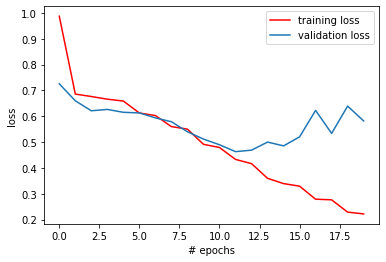

In [13]:
from matplotlib import pyplot as plt

plt.plot(final.history['loss'],'r',label='training loss')
plt.plot(final.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

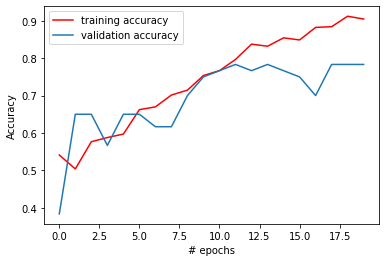

In [14]:
plt.plot(final.history['accuracy'],'r',label='training accuracy')
plt.plot(final.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.models import load_model

In [16]:
model=load_model("CT_Covid_best_model_2.hdf5")

In [17]:
import os
y_actual=[]
y_test=[]

In [18]:
for i in range(test_data.shape[0]):
    img=np.expand_dims(test_data[i],axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0])
    y_actual.append(test_target[i,1])

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
y_test=np.array(y_test)
y_actual=np.array(y_actual)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm=confusion_matrix(y_actual,y_test)

In [22]:
import seaborn as sns

<AxesSubplot:>

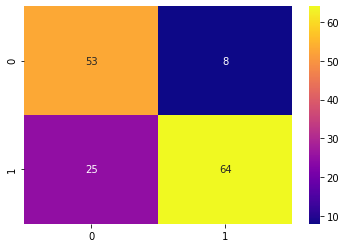

In [23]:
sns.heatmap(cm,cmap="plasma",annot=True)